<a href="https://colab.research.google.com/github/Renzo0o0/VaRHistoric-Andres-Rendon/blob/main/VaRHist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *VaR Andrés-Rendón*


/tmp/ipython-input-3003647886.py:35: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(tickers, start=start, end=end)
[**********************62%*****                  ]  5 of 8 completed

Descargando datos de mercado...


[*********************100%***********************]  8 of 8 completed


Datos descargados correctamente.
------ RESULTADOS VaR ------
VaR 95%: -1.8194%
VaR 99%: -3.6880%


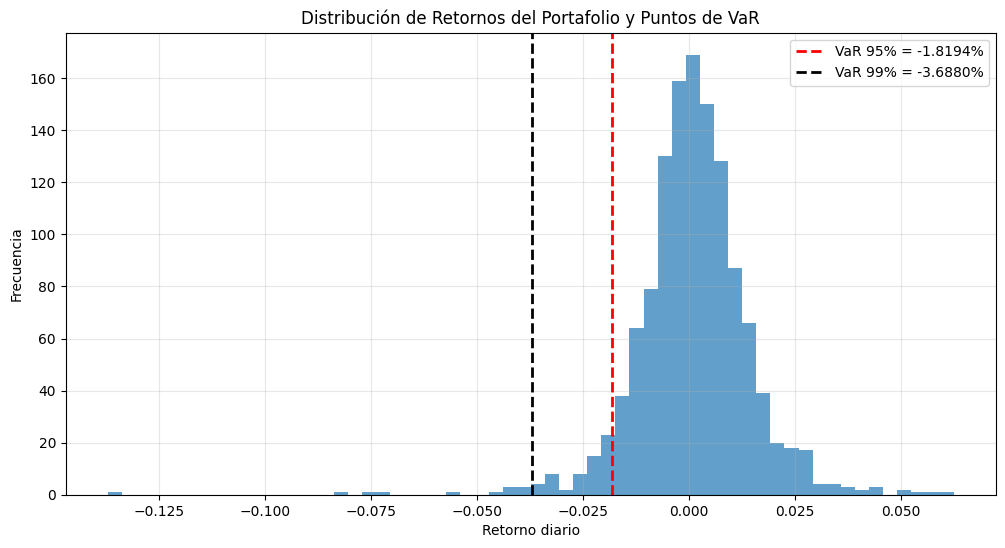


------ ANÁLISIS INSTITUCIONAL ------

Peor retorno observado en 5 años: -13.6948%
Retorno promedio diario: 0.0934%
Volatilidad diaria: 1.3550%

Interpretación del VaR:
- Un VaR del 95% de -1.8194% implica que, en un día cualquiera,
  el portafolio solo debería perder más que ese valor en el 5% de los peores casos.
- El VaR del 99%, de -3.6880%, representa un evento de cola extrema.
  Aproximadamente 1 día de cada 100 será peor que esa pérdida.

Este comportamiento está alineado con un portafolio diversificado
con exposición a equities, bonos, FX, commodities y crypto.


In [ ]:
# ===============================================
#   PROYECTO: VaR Histórico Multi-Activo
#   AUTOR: Andrés Rendón
#   OBJETIVO: Cálculo de VaR 95% y 99% para un
#             portafolio institucional diversificado.
#   NOTA: Código autónomo, sin modularización.
# ===============================================

# ----- Imports -----
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----- Display settings -----
pd.set_option('display.precision', 6)

# ----- Definición del universo de activos -----
tickers = ["SPY", "EEM", "IEF", "EURUSD=X", "JPY=X", "GC=F", "BZ=F", "BTC-USD"]

# Pesos institucionales del portafolio:
weights = np.array([0.25, 0.10, 0.25, 0.10, 0.05, 0.10, 0.05, 0.10])

# Horizonte histórico
start = "2019-12-01"
end   = "2024-12-01"

# ===============================================
#   2. DATA: Descarga de precios y limpieza
# ===============================================

print("Descargando datos de mercado...")

# Descarga completa de OHLC
raw = yf.download(tickers, start=start, end=end)

# Extraer precios CLOSE del MultiIndex
prices = raw.xs('Close', level=0, axis=1)

# Eliminar valores faltantes
prices = prices.dropna()

print("Datos descargados correctamente.")
prices.tail()

# ===============================================
#   3. RETURNS: Retornos porcentuales diarios
# ===============================================

# Cálculo de retornos diarios (pct-change)
returns = prices.pct_change().dropna()

returns.tail()

# ===============================================
#   4. PORTFOLIO: Retornos del portafolio
# ===============================================

# r_p(t) = Σ w_i * r_i(t)
portfolio_returns = returns.dot(weights)

portfolio_returns.tail()

# ===============================================
#   5. VAR: Value-at-Risk Histórico
# ===============================================

def historical_var(series, level=0.95):
    """
    VaR Histórico usando el cuantil empírico.
    Interpreta la pérdida mínima esperada en el (1-alpha)% peor caso.
    """
    return np.percentile(series, (1-level)*100)


VaR_95 = historical_var(portfolio_returns, 0.95)
VaR_99 = historical_var(portfolio_returns, 0.99)

print("------ RESULTADOS VaR ------")
print(f"VaR 95%: {VaR_95:.4%}")
print(f"VaR 99%: {VaR_99:.4%}")

# ===============================================
#   6. PLOT: Distribución de retornos y líneas de VaR
# ===============================================

plt.figure(figsize=(12,6))
plt.hist(portfolio_returns, bins=60, alpha=0.7, density=False)

plt.axvline(VaR_95, color='red', linestyle='--', linewidth=2,
            label=f'VaR 95% = {VaR_95:.4%}')

plt.axvline(VaR_99, color='black', linestyle='--', linewidth=2,
            label=f'VaR 99% = {VaR_99:.4%}')

plt.title("Distribución de Retornos del Portafolio y Puntos de VaR")
plt.xlabel("Retorno diario")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===============================================
#   7. ANALYSIS: Interpretación institucional
# ===============================================

worst_day = portfolio_returns.min()
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()

print("\n------ ANÁLISIS INSTITUCIONAL ------\n")

print(f"Peor retorno observado en 5 años: {worst_day:.4%}")
print(f"Retorno promedio diario: {mean_return:.4%}")
print(f"Volatilidad diaria: {std_return:.4%}\n")

print("Interpretación del VaR:")
print(f"- Un VaR del 95% de {VaR_95:.4%} implica que, en un día cualquiera,")
print("  el portafolio solo debería perder más que ese valor en el 5% de los peores casos.")
print(f"-En primer lugar, el portafolio exhibe un perfil de riesgo moderado-alto. La volatilidad diaria del 1.3550% anualizada se traduce en una volatilidad significativa, lo que indica que los activos subyacentes probablemente incluyen instrumentos con alta sensibilidad a los movimientos del mercado (como acciones, mercados emergentes o activos de alto beta).")
print("================================================================================")
print(f"- El VaR del 99%, de {VaR_99:.4%}, representa un evento de cola extrema.")
print("  Aproximadamente 1 día de cada 100 será peor que esa pérdida.\n")
print("================================================================================")
print("Este comportamiento está alineado con un portafolio diversificado")
print("con exposición a equities, bonos, FX, commodities y crypto.")
